In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [5]:
traindata = pd.read_excel(r"flighttrain.xlsx")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
traindata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Let's look at our column "Duration" and its unique values
traindata["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
# Let's Drop NaN values
traindata.dropna(inplace = True)

In [11]:
traindata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis (EDA)

* Now in our dataset as you can see that there are a whole lot of features which are of type object. The very first task is to convert thsese features into integer type.
* Keeping this in mind, we are going to look at 'Date_of_Journey' feature and basically divide it into two parts

   We are going to use <b>to_datetime</b> feature of panda to convert this feature into datetime dtype

We will be using:
* <b>.dt.day</b> method to extract only day of that year
* <b>.dt.month</b> method to extract only month of that year

In [12]:
traindata["Journey_Day"] = pd.to_datetime(traindata.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [13]:
traindata["Journey_Month"] = pd.to_datetime(traindata.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [14]:
traindata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
# Now we no more need 'Date_of_Journey' column, so let's drop it
traindata.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
traindata.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


* As we did with 'Date_of_Journey' column, we can also do with 'Dep_Time' (The time when the plane leaves).
* We will convert this column into <b>hours</b> and <b>minutes</b>

In [17]:
traindata["dep_hour"] = pd.to_datetime(traindata.Dep_Time).dt.hour
traindata["dep_minute"] = pd.to_datetime(traindata.Dep_Time).dt.minute

In [18]:
# Let's drop now 'Dep_Time' column as it's now of no use
traindata.drop(["Dep_Time"], axis = 1, inplace = True)

In [19]:
traindata.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


* Again here we are going to do formatting with 'Arrival_Time' column just like we did before with 'Date_of_Journey' column.
* We are going to extract the hours and mins from this feature and again finally drop the original column itself.

In [20]:
traindata["arrival_hour"] = pd.to_datetime(traindata.Arrival_Time).dt.hour
traindata["arrival_minute"] = pd.to_datetime(traindata.Arrival_Time).dt.minute

In [21]:
traindata.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
traindata.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


* Duration is the time taken by the plane to reach the destination.
* It is basically the difference between Arrival and Departure time.
* Now here we will be writing custom code to extract hours and minutes from 'Duration' column just like we did in previously 

In [23]:
# Converting duration cloumn into list
duration = list(traindata["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_minute = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_minute.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [24]:
# Let's add 'duration hours' and 'duration minute' to our dataset
traindata["duration_hours"] = duration_hours
traindata["duration_minutes"] = duration_minute

In [25]:
traindata.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
# Let's drop our 'Duration' column
traindata.drop(["Duration"], axis = 1, inplace = True)

In [27]:
traindata.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Dealing with categorical data

In [28]:
traindata["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

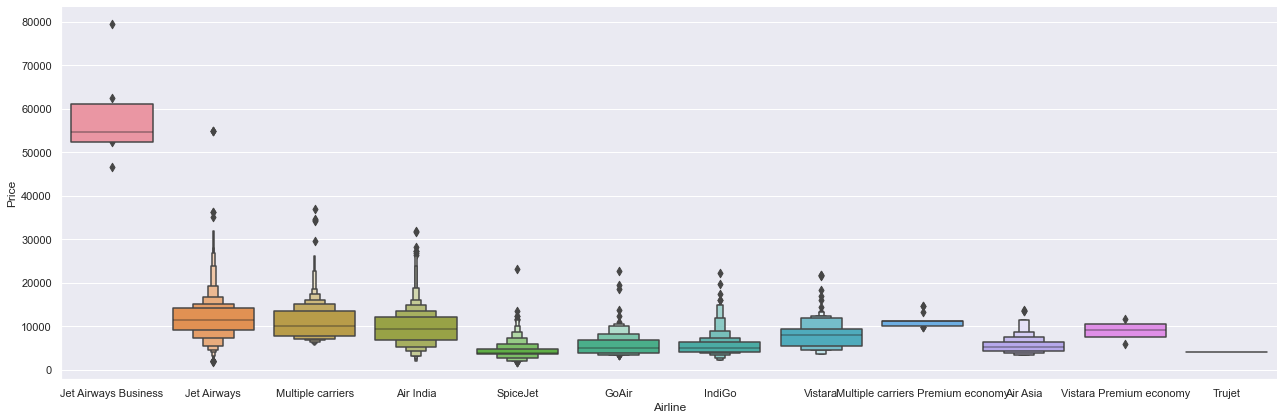

In [29]:
# Airline Vs. Price
sns.catplot(y = 'Price', x = 'Airline', data = traindata.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

* As from plot you can see that the 'Jet Airways Business' has the highest flight rate as compared to other airways flight rates.
* We can consider it as an outlier with respect to being an highest price in terms of flight rate as compared to other flight rates.

In [30]:
# Now let's do OneHotEncoding as the column 'Airline' is nominal data
Airline = traindata[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
traindata["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

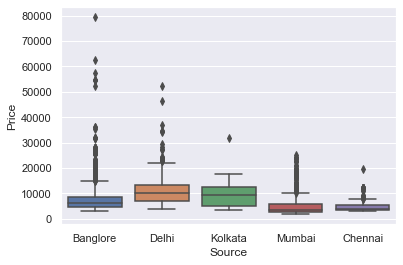

In [32]:
# Source Vs. Price
sns.boxplot(y = 'Price', x = 'Source', data = traindata.sort_values("Price", ascending = False))
plt.show()

* Some outliers can be seen w.r.to Source Banglore where price shoots somehow higher.
* Rest all of the other Sources seems to be having negligible outliers.

In [33]:
# Now let's do OneHotEncoding as the column 'Source' is nominal data
Source = traindata[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
traindata["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
Destination = traindata[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
traindata["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

* Now moving further, considering the "Route" column then this particular column can be dropped.
* Look at the "Total_Stops" column and "Route" column we will see this with an example.

* Route =  <b>BLR → NAG → DEL</b> : This basically indicates that from source to destination there are total <b>2 stops</b>.
* Total_Stops = <b>2 stops</b> : This information from "Toal_Stops" column says the same thing that from source to destination there are total <b>2 stops</b>.


So basically, its completely fine to drop the column "Route" as "Total_Stops" column is already doing our job.
Even <b>"Additional_Info"</b> column contains most of the values which are _No Info_ so we can even drop that column too

In [37]:
traindata.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [38]:
traindata.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## Dealing with Ordinal Data

In [39]:
traindata[['Total_Stops', 'Price']].head()

,Total_Stops,Price
0,non-stop,3897
1,2 stops,7662
2,2 stops,13882
3,1 stop,6218
4,1 stop,13302


As per our observation here we can see that when the flight has no stops, the fare rates decreases on the other side when flight has 1 or more than one stop, the rates gradually increases.

This means that the data in <b>'Total_Stops'</b> column is in ordered manner. So we are going to label encode the values here.

In [40]:
traindata.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [41]:
traindata.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [42]:
# Concatenate all data which we one hot encoded with our training data
datatrain = pd.concat([traindata, Airline, Source, Destination], axis = 1)

In [43]:
datatrain.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
datatrain.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [45]:
datatrain.head()

,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
datatrain.shape

(10682, 30)

## Test Dataset

In [47]:
testdata = pd.read_excel(r"flighttest.xlsx")

In [48]:
testdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Preprocessing w.r.to Test Dataset

Here we are going to repeat all the preprocessing steps which we did for our training set, so Let's go

In [49]:
# Let's Drop NaN values
testdata.dropna(inplace = True)

# EDA

#Date_of_Journey
testdata["Journey_Day"] = pd.to_datetime(testdata.Date_of_Journey, format = "%d/%m/%Y").dt.day
testdata["Journey_Month"] = pd.to_datetime(testdata.Date_of_Journey, format = "%d/%m/%Y").dt.month
testdata.drop(["Date_of_Journey"], axis = 1, inplace = True)

#Dep_Time
testdata["dep_hour"] = pd.to_datetime(testdata.Dep_Time).dt.hour
testdata["dep_minute"] = pd.to_datetime(testdata.Dep_Time).dt.minute
testdata.drop(["Dep_Time"], axis = 1, inplace = True)

#Arrival_Time
testdata["arrival_hour"] = pd.to_datetime(testdata.Arrival_Time).dt.hour
testdata["arrival_minute"] = pd.to_datetime(testdata.Arrival_Time).dt.minute
testdata.drop(["Arrival_Time"], axis = 1, inplace = True)

# Converting duration cloumn into list
duration = list(testdata["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_minute = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_minute.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
# Let's add 'duration hours' and 'duration minute' to our dataset
testdata["duration_hours"] = duration_hours
testdata["duration_minutes"] = duration_minute
testdata.drop(["Duration"], axis = 1, inplace = True)

# One Hot Encoding

# Now let's do OneHotEncoding as the column 'Airline' is nominal data
print("Airline")
print("-"*75)
Airline = testdata[["Airline"]]
print(testdata["Airline"].value_counts())
Airline = pd.get_dummies(Airline, drop_first = True)

# Now let's do OneHotEncoding as the column 'Source' is nominal data
print("Source")
print("-"*75)
Source = testdata[["Source"]]
print(testdata["Source"].value_counts())
Source = pd.get_dummies(Source, drop_first = True)

print("Destination")
print("-"*75)
Destination = testdata[["Destination"]]
print(testdata["Destination"].value_counts())
Destination = pd.get_dummies(Destination, drop_first = True)

testdata.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Ordinal Data
testdata.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate all data which we one hot encoded with our training data
datatest = pd.concat([testdata, Airline, Source, Destination], axis = 1)
datatest.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print("Shape of test data : ", datatest.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
Shape of test 

In [50]:
datatest.head()

,Total_Stops,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
datatrain.head()

,Total_Stops,Price,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [52]:
datatest.shape

(2671, 28)

## Feature Selection

Let's find out the best features including target variable which will suit best for our model

In [53]:
datatrain.shape

(10682, 30)

In [54]:
datatrain.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'dep_hour',
       'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hours',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

## Splitting Data into X and Y datasets

In [55]:
X = datatrain.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'dep_hour',
       'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hours',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_Day,Journey_Month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
y = datatrain["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

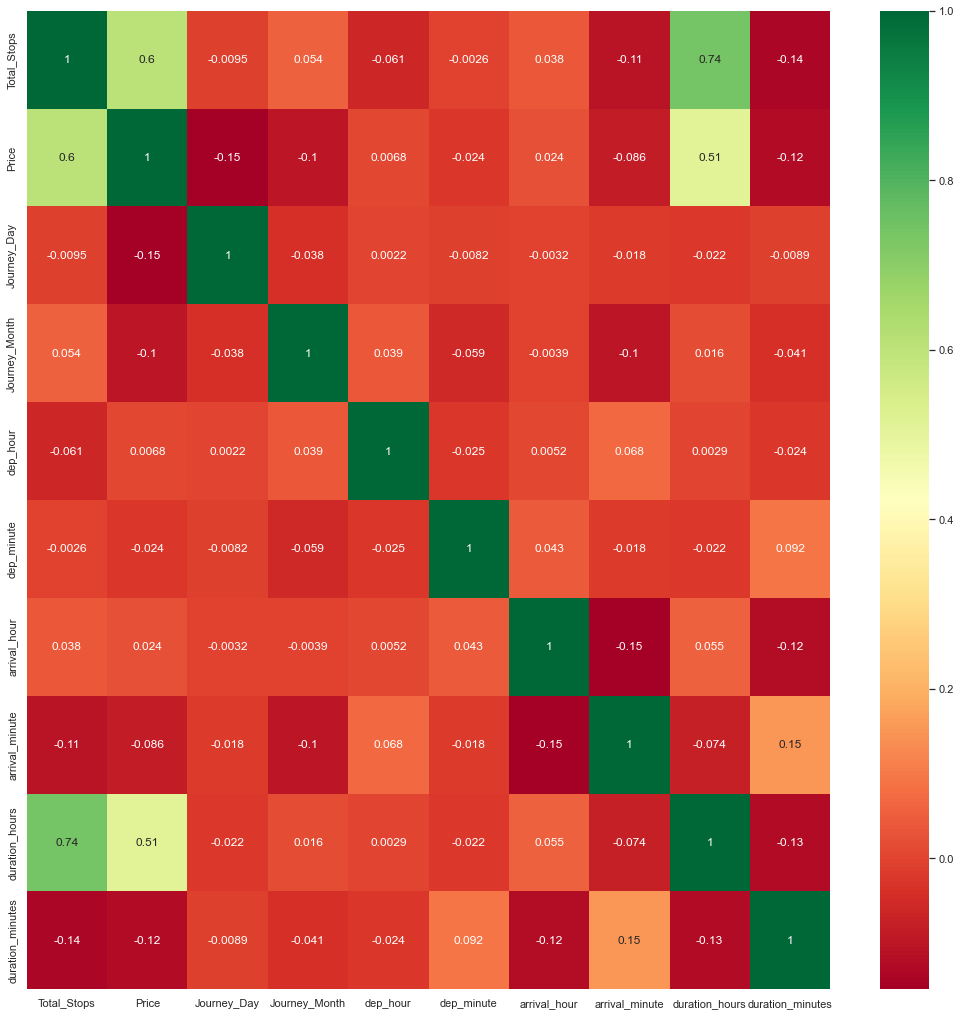

In [57]:
# Let's Find Co-relation between Dependent and Independent Features
plt.figure(figsize = (18,18))
sns.heatmap(traindata.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [58]:
# Taking Important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

<b>Note:</b> Incase if you're getting error which says <b>"ValueError: Input contains NaN, infinity or a value too large for dtype('float32')"</b> this is mostly because of infinite or null values in training dataset, to get rid of this you just have to run the below given code w.r.to training dataset

_<b>datatrain.replace([np.inf, -np.inf], np.nan, inplace=True)</b>_

In [59]:
print(selection.feature_importances_)

[2.32962020e-01 1.44144604e-01 5.34655149e-02 2.32487617e-02
 2.16634742e-02 2.76538509e-02 1.86733943e-02 1.08937298e-01
 1.82016054e-02 9.15731369e-03 2.24629242e-03 1.92828192e-02
 1.41649857e-01 6.73507009e-02 2.05200452e-02 8.04069687e-04
 3.44516817e-03 5.02521710e-03 8.32238944e-05 4.71500337e-04
 1.04766854e-02 3.11065241e-03 7.98914785e-03 1.04907394e-02
 1.69275816e-02 6.78909456e-03 3.62650424e-04 2.48667171e-02]


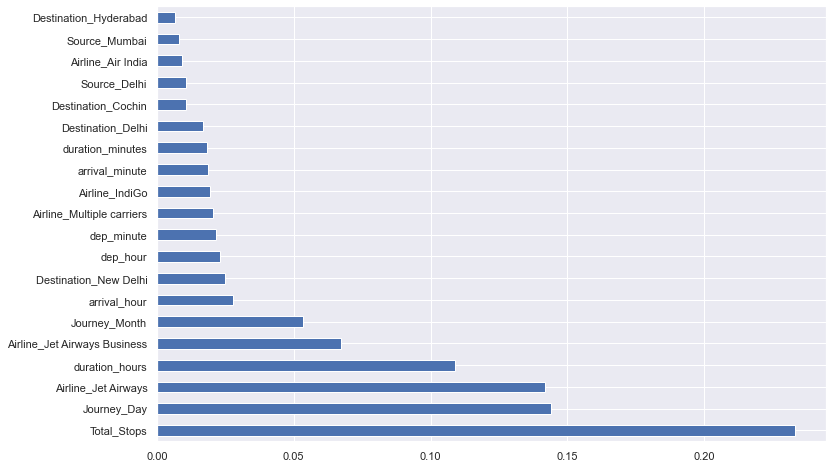

In [60]:
# Feature importances grapgh for better visualization
plt.figure(figsize = (12, 8))
featimportances = pd.Series(selection.feature_importances_, index = X.columns)
featimportances.nlargest(20).plot(kind = 'barh')
plt.show()

As per the observation, <b>'Total_Stops'</b> is our top-most important feature following that <b>'duration_hours'</b>, <b>'Journey_Day'</b> and <b>'Journey_Month'</b> are next important features.

## Random Forest Regressor
Now we are going to fit our model using Random Forest Regressor Algorithm

In [61]:
# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
ypredict = rfr.predict(X_test)

In [64]:
rfr.score(X_train, y_train)

0.9536347393738872

In [65]:
rfr.score(X_test, y_test)

0.7967831514157704

C:\Users\EmPeRor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


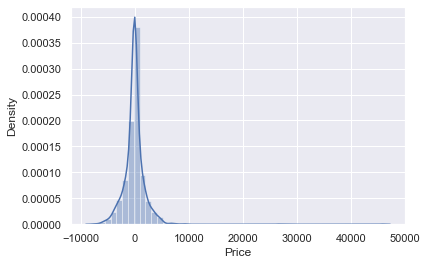

In [66]:
# Plotting graph to see the results
sns.distplot(y_test - ypredict)
plt.show()

As per graph, it is forming an Gaussian Distribution which shows a good sign in terms of our results.

## Perfomance Metrics
Now let's see the performance metrics to get more idea about our model performance

In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypredict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypredict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypredict)))

Mean Absolute Error: 1177.7664100364227
Mean Squared Error: 4381773.135191816
Root Mean Squared Error: 2093.268529164812


In [68]:
metrics.r2_score(y_test, ypredict)

0.7967831514157704

## Hyperparameter Tuning
* Now we are going to use RandomizedSearchCV for our hyperparameter tuning.
* We can also consider using GridSearchCV but RandomizedSearchCV is pretty fast so we're going to use that.

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# No. of trees in RandomForest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# No. of features in every Split
max_features = ['auto', 'sqrt']

# Max no. of levels in tree
max_depth = [int(x) for x in np.linspace (5, 30, num = 6)]

# Min no. of samples reqd. to split a tree
min_samples_split = [2, 5, 10, 15, 100]

# Max no. of samples reqd. at each leaf node
min_samples_leaf = [2, 5, 10, 15, 100]

In [71]:
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [72]:
# Random search of parameters using 5 fold cross validation
rfrandom = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, n_jobs = 1)

In [73]:
rfrandom.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   6.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   6.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10, 15, 100],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [74]:
rfrandom.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [75]:
# Let's do some prediction
prediction = rfrandom.predict(X_test)

C:\Users\EmPeRor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


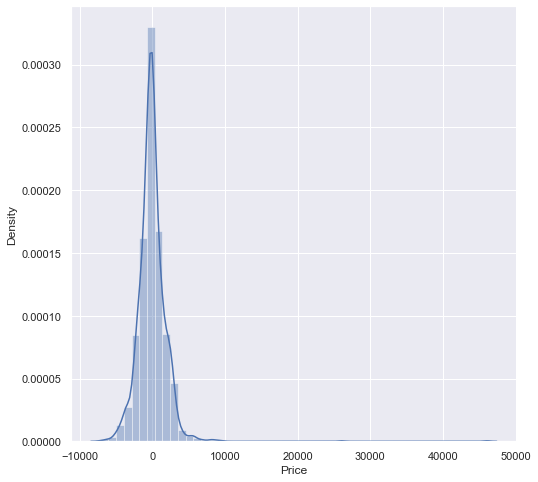

In [76]:
plt.figure(figsize = (8, 8))
sns.distplot(y_test - prediction)
plt.show()

Again we got Gaussian Distribution which is just perfect! and a good sign for our prediction results.

In [77]:
## Perormance Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 1277.9002309256794
Mean Squared Error: 4277989.783426293
Root Mean Squared Error: 2068.3301920695094


## Saving our pickle Model for later use

In [78]:
import pickle
# Open file where you want to save model
file = open('flightpredict_rf.pkl', 'wb')

# Dumping information to file
pickle.dump (rfrandom, file)

In [79]:
model = open('flightpredict_rf.pkl', 'rb')
forest = pickle.load(model)

EOFError: Ran out of input

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)